In [7]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한 만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config= tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

#모델 학습 시 불필요한 출력을 끄도록함 (warning)
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

## 1. data 수집

In [61]:
from icrawler.builtin import GoogleImageCrawler
import urllib.parse as parse

qer={"query":"증명사진"}
param=parse.urlencode(qer)

google_crawler = GoogleImageCrawler(
    feeder_threads=1,
    parser_threads=1,
    downloader_threads=4,
    storage={'root_dir': 'your_image_dir'})

filters = dict(
    size='large',
    type='face',
    license='noncommercial',
    date=((2015, 1, 1), (2019, 7, 11)))


google_crawler.crawl(keyword= '무표정', language='Korean', filters=filters, offset=0, max_num=400,
                     min_size=(200,200), max_size=None, file_idx_offset=0)


2019-07-19 12:21:48,077 - INFO - icrawler.crawler - start crawling...
2019-07-19 12:21:48,078 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-07-19 12:21:48,080 - INFO - feeder - thread feeder-001 exit
2019-07-19 12:21:48,082 - INFO - icrawler.crawler - starting 1 parser threads...
2019-07-19 12:21:48,084 - INFO - icrawler.crawler - starting 4 downloader threads...
2019-07-19 12:21:49,211 - INFO - parser - parsing result page https://www.google.com/search?q=%EB%AC%B4%ED%91%9C%EC%A0%95&ijn=0&start=0&tbs=isz%3Al%2Citp%3Aface%2Csur%3Af%2Ccdr%3A1%2Ccd_min%3A01%2F01%2F2015%2Ccd_max%3A07%2F11%2F2019&tbm=isch&lr=lang_Korean
2019-07-19 12:21:50,428 - INFO - downloader - image #1	https://i.ytimg.com/vi/P6UUqJSYqak/maxresdefault.jpg
2019-07-19 12:21:50,489 - INFO - downloader - image #2	http://file3.instiz.net/data/cached_img/upload/2018/05/13/0/87309f396b06afba00e879d9ed5a8dc6.jpg
2019-07-19 12:21:50,965 - INFO - downloader - image #3	https://pbs.twimg.com/media/DakaZhBUMAARGpC.jp

2019-07-19 12:22:02,036 - INFO - downloader - image #40	https://scontent-cdg2-1.cdninstagram.com/vp/65d7c86f8a11114a45fe3618fd67d4d2/5DA07FA6/t51.2885-15/e35/59532428_446771492737085_7562438743870734559_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&se=8&ig_cache_key=MjA0MzYzMzc5MzEzMjQ0MjEwMA%3D%3D.2
2019-07-19 12:22:02,689 - INFO - downloader - image #41	https://img.momtalk.kr/post/normal/2015/10/2/7fd92243-c692-417c-9b4f-c07759fa9028_0_14467594.jpg
2019-07-19 12:22:02,694 - INFO - downloader - image #42	https://scontent-lhr3-1.cdninstagram.com/vp/9f894956a8b6260e4e286561af1d3c64/5D90C2EE/t51.2885-15/e35/55776560_642332579570874_56877098841475780_n.jpg?_nc_ht=scontent-lhr3-1.cdninstagram.com&_nc_cat=106&se=8&ig_cache_key=MjAxNjAzMDE4ODE5MTU5ODI1OA%3D%3D.2
2019-07-19 12:22:03,027 - INFO - downloader - image #43	https://post-phinf.pstatic.net/MjAxODAzMDhfMTc2/MDAxNTIwNDY2Njg2NDE5.ykIfjoqepY60zukqQyB2inOKvk8bqExwgcvGgQefpCog.dHKG0wvb0HGC1x3VT0VQ2-qGg4uEYgE0o9c6PXx1Ggcg.JPEG/P180307_23312

2019-07-19 12:22:13,051 - INFO - downloader - image #74	https://scontent-frt3-1.cdninstagram.com/vp/452f2aecb4828d848cf65a012826372c/5DBAE37C/t51.2885-15/e35/61388489_114384716469464_2861665401322832139_n.jpg?_nc_ht=scontent-frt3-1.cdninstagram.com&se=7&ig_cache_key=MjA1NTE3OTg4MzgwOTg4NDQ2Ng%3D%3D.2
2019-07-19 12:22:13,229 - INFO - downloader - image #75	https://i.ytimg.com/vi/NPLtktu6dI8/maxresdefault.jpg
2019-07-19 12:22:13,289 - ERROR - downloader - Response status code 403, file https://scontent-yyz1-1.cdninstagram.com/vp/8709502aa10d717b9eb87588dd51b1ed/5CB796DD/t51.2885-15/e35/47692394_552135515268177_7374543013216068987_n.jpg?_nc_ht=scontent-yyz1-1.cdninstagram.com&se=8
2019-07-19 12:22:14,108 - INFO - parser - parsing result page https://www.google.com/search?q=%EB%AC%B4%ED%91%9C%EC%A0%95&ijn=1&start=100&tbs=isz%3Al%2Citp%3Aface%2Csur%3Af%2Ccdr%3A1%2Ccd_min%3A01%2F01%2F2015%2Ccd_max%3A07%2F11%2F2019&tbm=isch&lr=lang_Korean
2019-07-19 12:22:14,401 - INFO - downloader - image #7

2019-07-19 12:22:27,303 - INFO - downloader - image #107	https://t1.daumcdn.net/cfile/tistory/997992405B53BD301F
2019-07-19 12:22:27,599 - INFO - downloader - image #108	https://i.pinimg.com/originals/a8/df/75/a8df75bff042e620d7d5dadbda6be2ce.jpg
2019-07-19 12:22:27,716 - INFO - downloader - image #109	https://scontent-lhr3-1.cdninstagram.com/vp/3773c4b039e3f97d537cc552b289c932/5DC26968/t51.2885-15/e35/s1080x1080/61975388_2290179501028404_6458946616298586746_n.jpg?_nc_ht=scontent-lhr3-1.cdninstagram.com&ig_cache_key=MjA3MTAxMTAyNDQ1NjAwMjI5Ng%3D%3D.2
2019-07-19 12:22:28,745 - INFO - downloader - image #110	https://i.imgur.com/mgctoZW.jpg
2019-07-19 12:22:29,319 - INFO - downloader - image #111	http://harulee.com/wp-content/uploads/2013/04/IMG_0454-e1366308142755.jpg
2019-07-19 12:22:29,863 - INFO - downloader - image #112	https://images.pexels.com/photos/325895/pexels-photo-325895.jpeg?cs=srgb&dl=-325895.jpg&fm=jpg
2019-07-19 12:22:30,001 - INFO - downloader - image #113	https://sconte

2019-07-19 12:22:41,464 - INFO - downloader - image #141	http://www.rookie.co.kr/news/photo/201706/10164_6062_5615.jpg
2019-07-19 12:22:41,726 - INFO - downloader - image #142	http://mblogthumb4.phinf.naver.net/MjAxNzA4MDJfNjQg/MDAxNTAxNjQ3NjI1MTgw.-KSMrOr7JOCNxw16biLiuyqc0bSQaUtSKs1oYN_5D88g.ToItbjQqTxPIRXz7AanBgFpA84Zd9_LdSkA51DWKEwsg.JPEG.qkrwnsehf/%EB%AF%B8%EB%82%98.jpg?type=w2
2019-07-19 12:22:41,938 - INFO - downloader - image #143	https://scontent-lga3-1.cdninstagram.com/vp/620729f0120f1a4196a9cff8f6b2d43f/5D91E53E/t51.2885-15/e35/59865424_368071290488761_1753775223579017132_n.jpg?_nc_ht=scontent-lga3-1.cdninstagram.com
2019-07-19 12:22:42,039 - INFO - downloader - image #144	https://ncache.ilbe.com/files/attach/new/20181014/377678/4980566787/10787582392/c9b07f32adc0b6a4875921b9a167b268.jpg
2019-07-19 12:22:42,104 - ERROR - downloader - Response status code 403, file https://scontent-frt3-2.cdninstagram.com/vp/35b19f63a7b4c4eb0da62766c48eb454/5C064415/t51.2885-15/e35/36650031_62

2019-07-19 12:22:51,642 - INFO - downloader - image #171	http://www.topstarnews.net/news/photo/201803/377972_22454_3715.png
2019-07-19 12:22:52,500 - INFO - downloader - image #172	https://scontent-frt3-2.cdninstagram.com/vp/0e04d7604a41f7918c24609ee8ca840d/5D8EA1FF/t51.2885-15/e35/61620989_123656898846336_6072974458997270120_n.jpg?_nc_ht=scontent-frt3-2.cdninstagram.com&se=8&ig_cache_key=MjA2MDE4MDgyMTc0NDMwOTczMA%3D%3D.2
2019-07-19 12:22:53,201 - INFO - downloader - image #173	http://t1.daumcdn.net/tvpot/thumb/sde4310MeSa1D5PZP1D0Yyi/thumb.png?ts=1546148652
2019-07-19 12:22:53,211 - INFO - downloader - image #174	https://scontent-lga3-1.cdninstagram.com/vp/3f952b284cd26b29fc61b8eb12a964cc/5D8F9726/t51.2885-15/e35/61039005_597883864043267_174358419077068850_n.jpg?_nc_ht=scontent-lga3-1.cdninstagram.com
2019-07-19 12:22:53,727 - INFO - downloader - image #175	https://scontent-iad3-1.cdninstagram.com/vp/105ac27d0386d6a93bf0d256f27b9828/5D3B8413/t51.2885-15/e35/54513211_407872943331897_7

2019-07-19 12:23:02,001 - ERROR - downloader - Exception caught when downloading file https://scontent-mrs1-1.cdninstagram.com/vp/6ff7c5c474b508e8cd67a55fb4f5f1c1/5C2AD087/t51.2885-15/e35/39914503_273345039946965_6960766660978409472_n.jpg, error: HTTPSConnectionPool(host='scontent-mrs1-1.cdninstagram.com', port=443): Max retries exceeded with url: /vp/6ff7c5c474b508e8cd67a55fb4f5f1c1/5C2AD087/t51.2885-15/e35/39914503_273345039946965_6960766660978409472_n.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002293F06F8D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)), remaining retry times: 1
2019-07-19 12:23:02,004 - ERROR - downloader - Exception caught when downloading file https://scontent-mrs1-1.cdninstagram.com/vp/6ff7c5c474b508e8cd67a55fb4f5f1c1/5C2AD087/t51.2885-15/e35/39914503_273345039946965_6960766660978409472_n.jpg, error: HTTPSConnectionPool(host='scontent-mrs1-1.cdninstagram.com', port=443): Max retries

2019-07-19 12:23:08,302 - INFO - downloader - image #220	https://data.ygosu.com/upload_files/board_love/116692/5b59e1fe982e9.jpeg
2019-07-19 12:23:09,066 - INFO - downloader - image #221	https://scontent-bru2-1.cdninstagram.com/vp/1e2e1397611aece7565b8aab2c056188/5D405C30/t51.2885-15/e35/52633088_648547402245253_480288062030722816_n.jpg?_nc_ht=scontent-bru2-1.cdninstagram.com&se=7&ig_cache_key=MTk5NTAyMDEzNTY1Njg5ODM1MQ%3D%3D.2
2019-07-19 12:23:09,190 - INFO - downloader - image #222	https://scontent-yyz1-1.cdninstagram.com/vp/f9b63333ed957dfe49329b60ce41399c/5D657DB4/t51.2885-15/e35/s1080x1080/58004206_442713816275735_7867696988333728095_n.jpg?_nc_ht=scontent-yyz1-1.cdninstagram.com
2019-07-19 12:23:09,357 - INFO - downloader - image #223	http://www.topstarnews.net/news/photo/201812/545885_215823_1141.png
2019-07-19 12:23:10,679 - INFO - downloader - image #224	https://www.instagram.com/p/9Szgc9kPQV/media?size=l
2019-07-19 12:23:10,708 - ERROR - downloader - Exception caught when down

2019-07-19 12:23:16,384 - INFO - downloader - image #242	https://scontent-lhr3-1.cdninstagram.com/vp/a9dfdcc007789eac406ab565338adb0d/5D87E760/t51.2885-15/e35/47693401_750147928711439_1963795979336414793_n.jpg?_nc_ht=scontent-lhr3-1.cdninstagram.com&_nc_cat=111&se=8&ig_cache_key=MTk1NTIwODA5NjQ3MDUwODg2OA%3D%3D.2
2019-07-19 12:23:16,760 - INFO - downloader - image #243	https://scontent-sjc3-1.cdninstagram.com/vp/215999b4d02b97c0de88f6f11753d9cc/5D9FD189/t51.2885-15/e35/18646012_810592452427637_6575072365800062976_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com
2019-07-19 12:23:17,354 - INFO - downloader - image #244	https://www.nemopan.com/files/attach/images/6294/132/760/012/92bc5431e980f8e96506eecdc231faf1.jpeg
2019-07-19 12:23:17,867 - INFO - downloader - image #245	https://scontent-lht6-1.cdninstagram.com/vp/215573f4fe75855880dd8055fff0a39b/5D49AB7A/t51.2885-15/e35/38643408_156570818540479_4704791821253869568_n.jpg?_nc_ht=scontent-lht6-1.cdninstagram.com&se=7&ig_cache_key=MTg0ODQ5ODk

2019-07-19 12:23:33,055 - INFO - downloader - image #276	https://scontent-lga3-1.cdninstagram.com/vp/5e1c3331aed5757fb63c263222cff08f/5D9D1EBF/t51.2885-15/e35/57056274_1698484363631105_4837005777419254245_n.jpg?_nc_ht=scontent-lga3-1.cdninstagram.com
2019-07-19 12:23:33,397 - INFO - downloader - image #277	https://scontent-frt3-1.cdninstagram.com/vp/fcd57cfbf9e826363c7f531b7b2d9967/5DBE6928/t51.2885-15/e35/42003995_109727603255461_2294737287057657607_n.jpg?_nc_ht=scontent-frt3-1.cdninstagram.com&se=7&ig_cache_key=MTg4Mjc1NDgxNTQ1OTMzMDY2OQ%3D%3D.2
2019-07-19 12:23:34,052 - INFO - downloader - image #278	https://scontent-lht6-1.cdninstagram.com/vp/0ff84a7ed54c86e70f1360a249701b90/5D869647/t51.2885-15/e35/s1080x1080/61712984_414121615890909_1395658147318998991_n.jpg?_nc_ht=scontent-lht6-1.cdninstagram.com&ig_cache_key=MjA2NzkzNTYzMjAwNDc3MjM5NQ%3D%3D.2
2019-07-19 12:23:34,282 - ERROR - downloader - Response status code 403, file https://scontent-dub4-1.cdninstagram.com/vp/0be62d7b8a30c0f

2019-07-19 12:23:47,788 - INFO - downloader - image #307	https://scontent-atl3-1.cdninstagram.com/vp/0e3f99de1e63812a493a28f0c97a0c34/5D3CDB03/t51.2885-15/e35/51392208_514121202328468_4144213156947241068_n.jpg?_nc_ht=scontent-atl3-1.cdninstagram.com
2019-07-19 12:23:47,925 - INFO - downloader - image #308	https://scontent-cdg2-1.cdninstagram.com/vp/d1619a249f8b41069fa22430926016b2/5D58AA20/t51.2885-15/e35/p1080x1080/59650448_2411174695772144_4124893409975448837_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&ig_cache_key=MjA0NzIzMjkwOTIyOTY2MjI0OQ%3D%3D.2
2019-07-19 12:23:47,994 - ERROR - downloader - Response status code 404, file http://amang.pagepia.com/data/file/contest/1889181732_nYpxms5e_DSC02383.JPG
2019-07-19 12:23:48,184 - INFO - downloader - image #309	http://file3.instiz.net/data/cached_img/upload/2018/05/13/0/bbb6bd3b4c639a996247466dcb8fb13d.jpg
2019-07-19 12:23:48,343 - INFO - downloader - image #310	https://dispatch.cdnser.be/wp-content/uploads/2016/12/369dc7f4ee26f887c1c1f

## Crop face region by OpenCV face detection - RGB 유지

In [66]:
import cv2
import os
import numpy as np


path = 'C:/Users/Affinity/your_image_dir'
save_path = 'C:/Users/Affinity/0'
base_name = 'bigss'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

image = load_images_from_folder(path)
#print(image[1])

for i in range(len(image)):
    #print(image[i])
    img = image[i]
    image_copy = np.copy(img)
#     b, g, r = cv2.split(img)
#     img2 = cv2.merge([r, g, b])
#     img3 =img2
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.25, 6)
    #print('--------------------------------------------------')
    
    face_crop = []
    for f in faces:
        x, y, w, h = [ v for v in f ]
        cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255,0,0), 3)
        face_crop.append(img[y:y+h, x:x+w])
    
    for face in face_crop:
        
        filename = "%s/dfile_%d.jpg"%(save_path, i)
        cv2.imwrite(filename, face)
        cv2.waitKey(0)

## +  파란 이미지 원래로 돌려놓기

In [ ]:
img = cv2.imread("")
img = cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB)

In [ ]:
import cv2
import os


path = 'C:/Users/Affinity/predict'
save_path = 'C:/Users/Affinity/class2'
base_name = 'crop_face'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

image = load_images_from_folder(path)

for i in range(len(image)):
    img = cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB)
#     b, g, r = cv2.split(img)
#     img2 = cv2.merge([r, g, b])
#     img3 =img2
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.25, 6)
    
    filename = "%s/file_%d.jpg"%(save_path, i)
    cv2.imwrite(filename, img)
    cv2.waitKey(0)

## dir 만들기

In [5]:
# os -> 운영체제에서 제공되는 여러 기능을 파이썬에서 수행
# shutil -> (shell utility)는 파일 및 디렉터리 작업을 수행하는 데 사용할 모듈
import os, shutil


# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/Users/Affinity/org_train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:/Users/Affinity/asian_datasets'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

In [3]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_0_dir = os.path.join(train_dir, '0')
os.mkdir(train_0_dir)

validation_0_dir = os.path.join(validation_dir, '0')
os.mkdir(validation_0_dir)

test_0_dir = os.path.join(test_dir, '0')
os.mkdir(test_0_dir)



train_1_dir = os.path.join(train_dir, '1')
os.mkdir(train_1_dir)

validation_1_dir = os.path.join(validation_dir, '1')
os.mkdir(validation_1_dir)

test_1_dir = os.path.join(test_dir, '1')
os.mkdir(test_1_dir)



train_2_dir = os.path.join(train_dir, '2')
os.mkdir(train_2_dir)

validation_2_dir = os.path.join(validation_dir, '2')
os.mkdir(validation_2_dir)

test_2_dir = os.path.join(test_dir, '2')
os.mkdir(test_2_dir)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/Affinity/smile_datasets\\train'

## dir 선언 

In [2]:
import os

base_dir = 'C:/Users/Affinity/smile_datasets'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_0_dir = os.path.join(train_dir, '0')
validation_0_dir = os.path.join(validation_dir, '0')
test_0_dir = os.path.join(test_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
validation_1_dir = os.path.join(validation_dir, '1')
test_1_dir = os.path.join(test_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
validation_2_dir = os.path.join(validation_dir, '2')
test_2_dir = os.path.join(test_dir, '2')

## Data split

In [7]:
# non smile split

fnames = ['non ({}).jpg'.format(i) for i in range(1,901)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/0', fname)
    dst = os.path.join(train_0_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['non ({}).jpg'.format(i) for i in range(901, 1202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/0', fname)
    dst = os.path.join(validation_0_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['non ({}).jpg'.format(i) for i in range(1202, 1762)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/0', fname)
    dst = os.path.join(test_0_dir, fname)
    shutil.copyfile(src, dst)
    

# smile split

fnames = ['smile ({}).jpg'.format(i) for i in range(1,901)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/1', fname)
    dst = os.path.join(train_1_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['smile ({}).jpg'.format(i) for i in range(901, 1202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/1', fname)
    dst = os.path.join(validation_1_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['smile ({}).jpg'.format(i) for i in range(1202, 2016)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/1', fname)
    dst = os.path.join(test_1_dir, fname)
    shutil.copyfile(src, dst)

    
# non smile split

fnames = ['fake ({}).jpg'.format(i) for i in range(1,901)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/2', fname)
    dst = os.path.join(train_2_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['fake ({}).jpg'.format(i) for i in range(901, 1102)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/2', fname)
    dst = os.path.join(validation_2_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['fake ({}).jpg'.format(i) for i in range(1102, 1150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/2', fname)
    dst = os.path.join(test_2_dir, fname)
    shutil.copyfile(src, dst)

## Categorical Classification
## (Real Smile, Non, Fake Smile)
## -> Crop face region by OpenCV face detection

In [3]:
from keras.preprocessing.image import ImageDataGenerator


'''
ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 tensor로 자동 변환해주는 python generator
'''

# 모든 이미지를 1/255로 스케일을 조정합니다 -> 픽셀 값을 0~255 사이의 스케일을 [0,1] 사이로 조정 (신경망은 작은 입력 값을 선호) 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


'''
전체 Sample에서 Batch를 반복 반환하기 위한 generator
'''
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(64, 64),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='categorical'
    ,color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
    class_mode='categorical',
        color_mode='grayscale')


##### test data Preprocessing
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
    class_mode='categorical',
    color_mode='grayscale')


NameError: name 'train_dir' is not defined

## Define Network - yun1

In [4]:
from keras import layers
from keras import models

model = models.Sequential()

                     # 32- > filter의 수 -> output
model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
#복잡한 데이터에서 스트라이드를 커널사이즈보다 크게되면 더 잘 나올 수도 잇음 

Using TensorFlow backend.


In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/40
100/100 [==============================] - 6s 63ms/step - loss: 0.9454 - acc: 0.5285 - val_loss: 0.6463 - val_acc: 0.7782
Epoch 2/40
100/100 [==============================] - 4s 41ms/step - loss: 0.5790 - acc: 0.7670 - val_loss: 0.4795 - val_acc: 0.7874
Epoch 3/40
100/100 [==============================] - 4s 42ms/step - loss: 0.4756 - acc: 0.8190 - val_loss: 0.4975 - val_acc: 0.8118
Epoch 4/40
100/100 [==============================] - 4s 39ms/step - loss: 0.4089 - acc: 0.8410 - val_loss: 0.3781 - val_acc: 0.8515
Epoch 5/40
100/100 [==============================] - 4s 43ms/step - loss: 0.3458 - acc: 0.8690 - val_loss: 0.3693 - val_acc: 0.8613
Epoch 6/40
100/100 [==============================] - 4s 44ms/step - loss: 0.3301 - acc: 0.8780 - val_loss: 0.6982 - val_acc: 0.7497
Epoch 7/40
100/100 [==============================] - 4s 44ms/step - loss: 0.2837 - acc: 0.8960 - val_loss: 0.5432 - val_acc: 0.7874
Epoch 8/40
100/100 [==============================] - 4s 44ms/step - 

## acc, loss 그래프 - yun1

loss:  0.15486289892915062
val loss:  0.5862286250066845

acc:  0.9390999964624644
val acc:  0.857435038303781


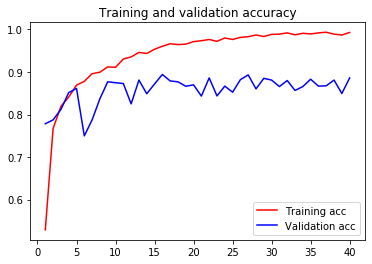

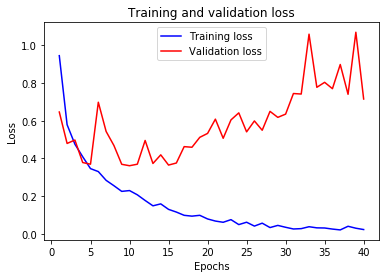

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("loss: ", np.mean(loss))
print("val loss: ", np.mean(val_loss))

print("acc: ", np.mean(acc))
print("val acc: ", np.mean(val_acc))


epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'r', label='Training loss')

# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 지수 평균 이동선

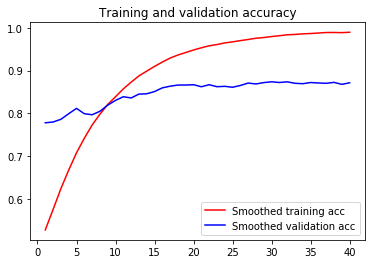

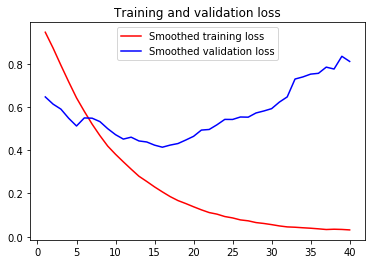

In [12]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##early stopping

In [27]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#ModelCheckpoint 구조정보, 각각 w에 할당되는 값을 저장

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                  ModelCheckpoint(filepath='EarlyStopModel.h5', monitor='val_loss', save_best_only=True)]

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              validation_steps=100,
                              epochs=40,
                              steps_per_epoch=100,
                              callbacks=callbacks_list)


# patience : n , mini-batch를 쓰면 오르락내리락을 할 수 있어서 오버피팅 되기전에 
# 올라갔다 다시 내려갈 수 있어서 n번정도는 기다려준다.

# 상대경로 : (모델 구조저장하는)포맷h5 --> model.h5 또는 ./model.h5==>파이썬을 돌리는 현재 경로에 저장
# ../model.h5 : 현재 경로의 상위 폴더
# 절대 경로 : 'C:/~/~/~/.model.h5'

# save_best_only = 'True' best만 저장



# history = EarlyStopModel.fit(X_train,
#                              y_train, 
#                              epochs=20,
#                              batch_size=256,
#                              validation_data=(X_valid, y_valid),
#                              callbacks = callbacks_list)

Epoch 1/40
100/100 [==============================] - 7s 66ms/step - loss: 1.0164 - acc: 0.4730 - val_loss: 0.7948 - val_acc: 0.6119
Epoch 2/40
100/100 [==============================] - 6s 60ms/step - loss: 0.6478 - acc: 0.7275 - val_loss: 0.7544 - val_acc: 0.6511
Epoch 3/40
100/100 [==============================] - 6s 63ms/step - loss: 0.5119 - acc: 0.7835 - val_loss: 0.5862 - val_acc: 0.7650
Epoch 4/40
100/100 [==============================] - 7s 66ms/step - loss: 0.4372 - acc: 0.8405 - val_loss: 0.3886 - val_acc: 0.8586
Epoch 5/40
100/100 [==============================] - 6s 62ms/step - loss: 0.3686 - acc: 0.8600 - val_loss: 0.3807 - val_acc: 0.8594
Epoch 6/40
100/100 [==============================] - 6s 63ms/step - loss: 0.3494 - acc: 0.8700 - val_loss: 0.3716 - val_acc: 0.8571
Epoch 7/40
100/100 [==============================] - 6s 63ms/step - loss: 0.3172 - acc: 0.8740 - val_loss: 0.3824 - val_acc: 0.8635
Epoch 8/40
100/100 [==============================] - 6s 63ms/step - 

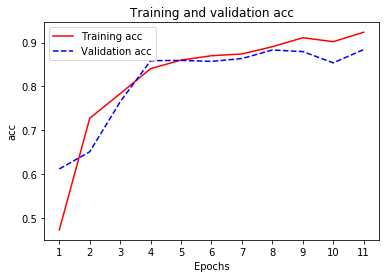

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'r', label='Training acc') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_acc, 'b--', label='Validation acc') # 'bo'는 파란색 점을 의미
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.xticks(epochs)
plt.legend()

plt.show()

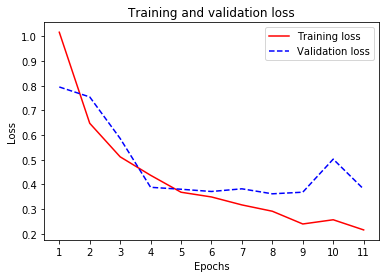

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'b--', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [5]:
from keras.models import load_model

model = load_model('EarlyStopModel.h5')
print('>> model load!!')

>> model load!!


In [6]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test loss: ', test_loss)
print('test acc: ', test_acc)

#저장된 모델 불러올 때 from keras.model import load_model

NameError: name 'test_generator' is not defined

# dir 바꿔서 asian_dataset으로 vgg16

In [1]:
# os -> 운영체제에서 제공되는 여러 기능을 파이썬에서 수행
# shutil -> (shell utility)는 파일 및 디렉터리 작업을 수행하는 데 사용할 모듈
import os, shutil


# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/Users/Affinity/org_train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:/Users/Affinity/asian_datasets'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

In [2]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [3]:
train_0_dir = os.path.join(train_dir, '0')
os.mkdir(train_0_dir)

validation_0_dir = os.path.join(validation_dir, '0')
os.mkdir(validation_0_dir)

test_0_dir = os.path.join(test_dir, '0')
os.mkdir(test_0_dir)



train_1_dir = os.path.join(train_dir, '1')
os.mkdir(train_1_dir)

validation_1_dir = os.path.join(validation_dir, '1')
os.mkdir(validation_1_dir)

test_1_dir = os.path.join(test_dir, '1')
os.mkdir(test_1_dir)



train_2_dir = os.path.join(train_dir, '2')
os.mkdir(train_2_dir)

validation_2_dir = os.path.join(validation_dir, '2')
os.mkdir(validation_2_dir)

test_2_dir = os.path.join(test_dir, '2')
os.mkdir(test_2_dir)

In [4]:
# non smile split

fnames = ['non ({}).jpg'.format(i) for i in range(1,401)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/0', fname)
    dst = os.path.join(train_0_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['non ({}).jpg'.format(i) for i in range(901, 502)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/0', fname)
    dst = os.path.join(validation_0_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['non ({}).jpg'.format(i) for i in range(502, 744)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/0', fname)
    dst = os.path.join(test_0_dir, fname)
    shutil.copyfile(src, dst)
    

# smile split

fnames = ['smile ({}).jpg'.format(i) for i in range(1,401)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/1', fname)
    dst = os.path.join(train_1_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['smile ({}).jpg'.format(i) for i in range(901, 502)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/1', fname)
    dst = os.path.join(validation_1_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['smile ({}).jpg'.format(i) for i in range(502, 601)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/1', fname)
    dst = os.path.join(test_1_dir, fname)
    shutil.copyfile(src, dst)

    
# non smile split

fnames = ['fake ({}).jpg'.format(i) for i in range(1,401)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/2', fname)
    dst = os.path.join(train_2_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['fake ({}).jpg'.format(i) for i in range(401, 502)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/2', fname)
    dst = os.path.join(validation_2_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['fake ({}).jpg'.format(i) for i in range(502, 837)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+ '/2', fname)
    dst = os.path.join(test_2_dir, fname)
    shutil.copyfile(src, dst)

## dir 선언

In [8]:
import os

base_dir = 'C:/Users/Affinity/asian_datasets'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_0_dir = os.path.join(train_dir, '0')
validation_0_dir = os.path.join(validation_dir, '0')
test_0_dir = os.path.join(test_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
validation_1_dir = os.path.join(validation_dir, '1')
test_1_dir = os.path.join(test_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
validation_2_dir = os.path.join(validation_dir, '2')
test_2_dir = os.path.join(test_dir, '2')

## yun2 vgg16 color flatten+dense(256,relu) + dropout(0.5) / 

In [30]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

In [31]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [32]:


from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 15,240,003
Trainable params: 15,240,003
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable =False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [35]:
conv_base.trainable =True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable= True
    else:
        layer.trainable = False

In [36]:
print('훈련되는 가중치의 수:', len(model.trainable_weights))

훈련되는 가중치의 수: 10


In [37]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
from keras.preprocessing.image import ImageDataGenerator
'''
ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 tensor로 자동 변환해주는 python generator
'''
# 모든 이미지를 1/255로 스케일을 조정합니다 -> 픽셀 값을 0~255 사이의 스케일을 [0,1] 사이로 조정 (신경망은 작은 입력 값을 선호) 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
'''
전체 Sample에서 Batch를 반복 반환하기 위한 generator
'''
train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리
    train_dir,
    # 모든 이미지를 150 × 150 크기로 바꿉니다
    target_size=(64, 64),
    batch_size=20,
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical')

##### test data Preprocessing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical')

Found 1200 images belonging to 3 classes.
Found 101 images belonging to 3 classes.
Found 676 images belonging to 3 classes.


In [39]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
100/100 [==============================] - 13s 129ms/step - loss: 0.9788 - acc: 0.5185 - val_loss: 1.1715 - val_acc: 0.4245
Epoch 2/40
 99/100 [============================>.] - ETA: 0s - loss: 0.7250 - acc: 0.6939

KeyboardInterrupt: 

In [28]:
import numpy as np

history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("loss: ", np.mean(loss))
print("val loss: ", np.mean(val_loss))

print("acc: ", np.mean(acc))
print("val acc: ", np.mean(val_acc))

loss:  0.12530176138891633
val loss:  2.4203039818489573
acc:  0.9577374986466023
val acc:  0.6589547666211916


## yun3 - 2의 early stop

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#ModelCheckpoint 구조정보, 각각 w에 할당되는 값을 저장

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                  ModelCheckpoint(filepath='EarlyStopModel.h5', monitor='val_loss', save_best_only=True)]

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              validation_steps=100,
                              epochs=40,
                              steps_per_epoch=100,
                              callbacks=callbacks_list)

Epoch 1/40
100/100 [==============================] - 19s 189ms/step - loss: 0.5141 - acc: 0.7845 - val_loss: 0.7488 - val_acc: 0.6935
Epoch 2/40
100/100 [==============================] - 20s 195ms/step - loss: 0.3599 - acc: 0.8620 - val_loss: 0.8646 - val_acc: 0.6350
Epoch 3/40
100/100 [==============================] - 21s 207ms/step - loss: 0.2345 - acc: 0.9160 - val_loss: 0.5681 - val_acc: 0.8002
Epoch 4/40
100/100 [==============================] - 23s 226ms/step - loss: 0.1560 - acc: 0.9485 - val_loss: 1.2670 - val_acc: 0.7018
Epoch 5/40
100/100 [==============================] - 23s 231ms/step - loss: 0.1207 - acc: 0.9595 - val_loss: 0.7743 - val_acc: 0.8514
Epoch 6/40
100/100 [==============================] - 27s 266ms/step - loss: 0.0589 - acc: 0.9775 - val_loss: 1.5654 - val_acc: 0.6535


In [41]:
import numpy as np

history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("loss: ", np.mean(loss))
print("val loss: ", np.mean(val_loss))

print("acc: ", np.mean(acc))
print("val acc: ", np.mean(val_acc))

loss:  0.24066654688698083
val loss:  0.9646896182949888
acc:  0.9079999960462252
val acc:  0.7225956737836702


In [1]:
from keras.models import load_model

model = load_model('EarlyStopModel.h5')
print('>> model load!!')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
>> model load!!


In [20]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test loss: ', test_loss)
print('test acc: ', test_acc)

NameError: name 'test_generator' is not defined

## 개별 사진 test

In [6]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('C:/Users/Affinity/asian_datasets/test/2/fake (530).jpg', cv2.IMREAD_COLOR)
print(img)

[[[155 155 155]
  [155 155 155]
  [155 155 155]
  ...
  [153 153 153]
  [153 153 153]
  [153 153 153]]

 [[155 155 155]
  [155 155 155]
  [155 155 155]
  ...
  [153 153 153]
  [153 153 153]
  [153 153 153]]

 [[155 155 155]
  [155 155 155]
  [155 155 155]
  ...
  [154 154 154]
  [154 154 154]
  [154 154 154]]

 ...

 [[217 217 217]
  [218 218 218]
  [218 218 218]
  ...
  [214 214 214]
  [214 214 214]
  [214 214 214]]

 [[218 218 218]
  [218 218 218]
  [218 218 218]
  ...
  [214 214 214]
  [214 214 214]
  [214 214 214]]

 [[218 218 218]
  [218 218 218]
  [219 219 219]
  ...
  [214 214 214]
  [214 214 214]
  [214 214 214]]]


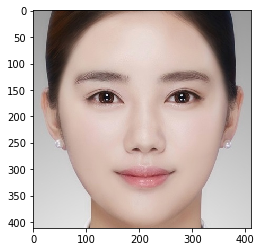

[[무표정(%), 진짜 웃음(%), 가짜 웃음(%)]] = [[0.10% 0.08% 99.82%]]


In [37]:
b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge

img3 = img2 # copy

img2 = cv2.resize(img2, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
img2 = img2.astype('float32') / 255
img2 = img2.reshape((1, 64, 64, 3))


predict_img = model.predict(img2, steps=1)

plt.imshow(img3)
plt.show()

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}%".format(x*100)})
print("[[무표정(%), 진짜 웃음(%), 가짜 웃음(%)]] =" , predict_img)

## yun2 시각화

## Data agumentation

In [ ]:
# Training Data의 조작, 변형
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(64, 64),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='categorical')

# Validation Data는 데이터 조작 하지 않음
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Training Model 
history = model.fit_generator(
      train_generator,          # training data -> 한 epoch에 32 x 100 = 3200 -> 100 epoch -> 320,000 images 
      steps_per_epoch=100,      # generator에선 데이터가 끝없이 생성되기 때문에, 하나의 epoch에서 얼마나 많은 샘플을 뽑을 것인지 
      epochs=40,               # 전체 / 배치사이즈 -> steps_per_epoch -> 직접 설정
      validation_data=validation_generator,
      validation_steps=50)

## Define network2

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

## 조기종료 콜백함수

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
#ModelCheckpoint 구조정보, 각각 w에 할당되는 값을 저장

EarlyStopModel = Sequential()
EarlyStopModel.add(Dense(16, activation='relu', input_shape=(10000,)))
EarlyStopModel.add(Dense(16, activation='relu'))
EarlyStopModel.add(Dense(1, activation='sigmoid'))

EarlyStopModel.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                  ModelCheckpoint(filepath='EarlyStopModel.h5', monitor='val_loss', save_best_only=True)]

# patience : n , mini-batch를 쓰면 오르락내리락을 할 수 있어서 오버피팅 되기전에 
# 올라갔다 다시 내려갈 수 있어서 n번정도는 기다려준다.

# 상대경로 : (모델 구조저장하는)포맷h5 --> model.h5 또는 ./model.h5==>파이썬을 돌리는 현재 경로에 저장
# ../model.h5 : 현재 경로의 상위 폴더
# 절대 경로 : 'C:/~/~/~/.model.h5'

# save_best_only = 'True' best만 저장

history = EarlyStopModel.fit(X_train,
                             y_train, 
                             epochs=20,
                             batch_size=256,
                             validation_data=(X_valid, y_valid),
                             callbacks = callbacks_list)

#generator 쓸 때

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                  ModelCheckpoint(filepath='EarlyStopModel.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(train_generator,
                   epochs=20,
                   batch_size=20
                   validation_data=validation_generator,
                   callbacks = callbacks_list)

## 조기종료 학습과정 확인

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'bo', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

## 최적 모델 불러오기

In [ ]:
from keras.models import load_model

model = load_model('EarlyStopModel.h5')
print('>> model load!!')

## 성능평가

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss: ', test_loss)
print('test acc: ', test_acc)

#저장된 모델 불러올 때 from keras.model import load_model


#generator는
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test loss: ', test_loss)
print('test acc: ', test_acc)

In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical')

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/Affinity/smile_datasets\\test'

## 시각화

In [37]:
## 개별 이미지 전처리하기
img_path= 'C:/Users/Affinity/asian_datasets/test/2/fake (530).jpg'

from keras.preprocessing import image
import numpy as np

img=image.load_img(img_path, target_size=(64,64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #이미지를 4d 텐서로 바꿔서 넣어줌 (0,64,64,3)
img_tensor/=255. #모델이 훈련될 대 입력에 적용한 전처리 방식을 동일하게 넣어줌

print(img_tensor.shape)

(1, 64, 64, 3)


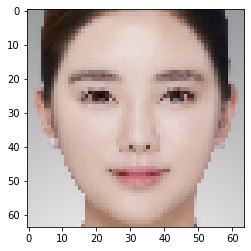

In [39]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [36]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs = model.input, outputs=layer_outputs)

#vgg는 multiple inbound node를 갖기 때문에 layer output이 ill-defined. get_output_at(node_index)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(first_layer_activation[0,:,:,19], cmap='viridis')# 이미지의 채널 중 20번째 채널을 뽑아보기

AttributeError: Layer vgg16 has multiple inbound nodes, hence the notion of "layer output" is ill-defined. Use `get_output_at(node_index)` instead.